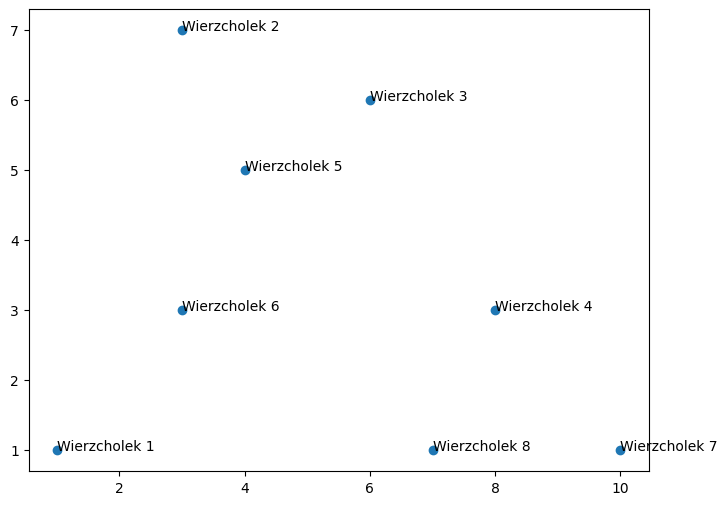

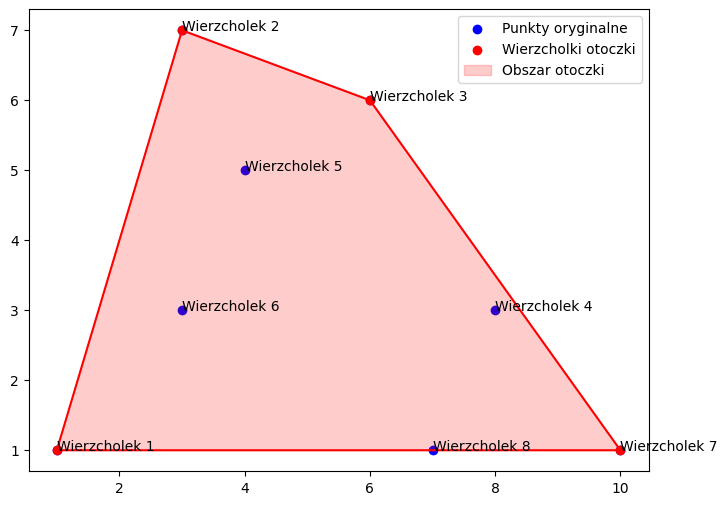

{'Wierzcholek 1': (1, 1),
 'Wierzcholek 2': (3, 7),
 'Wierzcholek 3': (6, 6),
 'Wierzcholek 7': (10, 1)}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

zbior = {
    "Wierzcholek 1": (1, 1),
    "Wierzcholek 2": (3, 7),
    "Wierzcholek 3": (6, 6),
    "Wierzcholek 4": (8, 3),
    "Wierzcholek 5": (4, 5),
    "Wierzcholek 6": (3, 3),
    "Wierzcholek 7": (10, 1),
    "Wierzcholek 8": (7, 1),
}

plt.figure(figsize=(8, 6))
plt.scatter([x for x, _ in zbior.values()], [y for _, y in zbior.values()])
for nazwa, (x, y) in zbior.items():
    plt.text(x, y, nazwa)

plt.show()

def czy_moga_wierzch(zbior: dict, rys = False):
    
    """Funkcja do sprawdzania które punkty na R2 moga byc wierzchołkami otoczki wypuklej zbudowanej na tych pkt, najprawdopodobniej tragicznie
    wydajna (nie bylo testow), ale ma naśladować działanie monotone chain. Co ciekawe, po odkryciu czegoś takiego jak sortowanie katowe, mozna bylo bardziej zoptymalizować miejsca, w których sprawdzam czy punkty są współliniowe, ale to może robota na kiedyś.
    """
    
    def linear_f(x, a, b):
        return a * x + b
    
    
    def sortowanie_katowe(wierzcholki: dict):
        """Funkcja do sortowania katowego, wykorzystuje funkcje z numpy arctan2, ktora zwraca katy w radianach kąt wektora kierunkowego zbudowanego z centroidu (srednia arytmetyczna wspolrzednych punktow) i konkretnego punktu. 

        Args:
            wierzcholki (dict): _description_

        Returns:
            _type_: zwraca posorotowane punkty wierzcholkow w kolejnosci "katowej"
        """
        points = np.array(list(wierzcholki.values()))
        centroid = np.mean(points, axis=0)
        angles = np.arctan2(points[:, 1] - centroid[1], points[:, 0] - centroid[0])
        sorted_indices = np.argsort(angles)
        return points[sorted_indices]
    
        #https://www.algorytm.edu.pl/olimpiada-informatyczna/katowe-zamiatanie.html mocne gowno, do pozniejszego mocniejszego przyswojenia
        # z researchu wynika, ze zamiast contangesa lepiej uzyc atan2, ewentualnie np.angle, ale to jeden chuj, mozna kiedys potestowac
    
    
    wierzcholki = {}
    
    for nazwa_A, cords_A in zbior.items():
        zbior_prawd = []
        zbior_copy = zbior.copy()
        zbior_copy.pop(nazwa_A)
        
        for nazwa_B, cords_B in zbior_copy.items():
            zbior_copy_copy = zbior_copy.copy()
            zbior_copy_copy.pop(nazwa_B)
            
            # tu zalatwiamy kwestie kiedy punkty leża na prostek wertykalnej
            if cords_B[0] == cords_A[0]:
                differences = np.array([x - cords_A[0] for x, _ in zbior_copy_copy.values()])
                if all(differences >= 1e-6) or all(differences <= 1e-6):
                    
                    mask = (np.abs(differences) < 1e-5)
                    #sprawdzenie wspoliniowosci
                    if mask.any():
                        wewnatrz = []
                        for nazwa_C in mask:
                            _, y = zbior_copy_copy[nazwa_C]
                            if cords_A[1] < y < cords_B[1] or cords_B[1] < y < cords_A[1]:
                                wewnatrz.append(True)
                            else:
                                wewnatrz.append(False)
                        if all(wewnatrz):
                            zbior_prawd.append(True)
                            continue
                        else:
                            zbior_prawd.append(False)
                            continue
                    
                    zbior_prawd.append(True)
            # tu cala reszte
            else:
                a = (cords_B[1] - cords_A[1]) / (cords_B[0] - cords_A[0])
                
                b = cords_A[1] - a * cords_A[0]
                values = [linear_f(x, a, b) for x, _ in zbior_copy_copy.values()]
                values_y = [y for _, y in zbior_copy_copy.values()]
                
                differences = np.array(values_y) - np.array(values)
                
                if all(differences >= 1e-2) or all(differences <= 1e-2):
                    #sprawdzenie wspoliniowosci
                    mask = (np.abs(differences) < 1e-5)
                    if mask.any():
                        wewnatrz = []
                        for nazwa_C in mask:
                            x, y = zbior_copy_copy[nazwa_C]
                            if cords_A[0] < x < cords_B[0] or cords_B[0] < x < cords_A[0]:
                                wewnatrz.append(True)
                            else:
                                wewnatrz.append(False)
                                
                        if all(wewnatrz):
                            zbior_prawd.append(True)
                            continue
                        
                        else:
                            zbior_prawd.append(False)
                            continue

                    zbior_prawd.append(True)
                    
                else:
                    zbior_prawd.append(False)
                
        if any(zbior_prawd):
            wierzcholki[nazwa_A] = cords_A
            
    if rys:
        sortowane = sortowanie_katowe(wierzcholki)
        
        x_sorted = [x for x, _ in sortowane] + [sortowane[0][0]] #domkniecie wielokata
        y_sorted = [y for _, y in sortowane] + [sortowane[0][1]] #to samo
        
        plt.figure(figsize=(8, 6))
        plt.scatter([x for x, _ in zbior.values()], [y for _, y in zbior.values()], color='blue', label='Punkty oryginalne')
        plt.scatter([x for x, _ in sortowane], [y for _, y in sortowane], color='red', label='Wierzcholki otoczki')
        plt.plot(x_sorted, y_sorted, color='red', linestyle='-')
        plt.fill(x_sorted, y_sorted, color='red', alpha=0.2, label='Obszar otoczki')
        for nazwa, (x, y) in zbior.items():
            plt.text(x, y, nazwa)
        plt.legend()
        plt.show()
    
    return wierzcholki
            

do_sortowania = czy_moga_wierzch(zbior, True)
do_sortowania

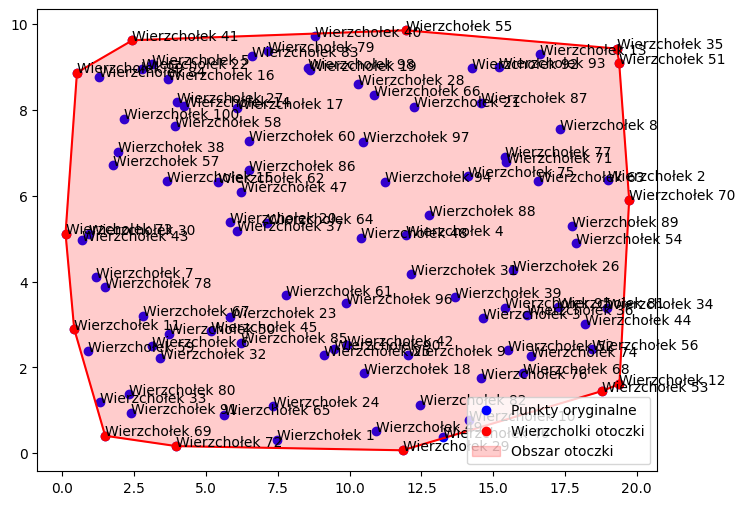

{'Wierzchołek 11': (0.41168988591604894, 2.8975145291376805),
 'Wierzchołek 12': (19.398197043239886, 1.6122128725400442),
 'Wierzchołek 29': (11.84829137724085, 0.06952130531190703),
 'Wierzchołek 35': (19.312640661491187, 9.429097039125192),
 'Wierzchołek 41': (2.4407646968955765, 9.624472949421111),
 'Wierzchołek 51': (19.391692555291172, 9.082658859666537),
 'Wierzchołek 53': (18.789978831283783, 1.448948720912231),
 'Wierzchołek 55': (11.957999576221702, 9.856504541106007),
 'Wierzchołek 69': (1.4910128735954165, 0.40775141554763916),
 'Wierzchołek 70': (19.737738732010346, 5.908929431882418),
 'Wierzchołek 72': (3.974313630683448, 0.16587828927856152),
 'Wierzchołek 73': (0.11044234247204798, 5.12093058299281),
 'Wierzchołek 99': (0.5083825348819038, 8.870864242651173)}

In [4]:
np.random.seed(42)
n = 100 # przy 1000 juz troche mieli jak coś XD
xs = np.random.uniform(0, 20, n)
ys = np.random.uniform(0, 10, n)

zbior_losowe = {f"Wierzchołek {i+1}": (float(xs[i]), float(ys[i])) for i in range(n)}

czy_moga_wierzch(zbior_losowe, True)